In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression
ICU = pd.read_csv("Preprocessed ICU data.csv")

In [2]:
ICU

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,...,12.000000,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,...,60.000000,162.000000,0.400000,2.395461,212.000000,1.300000,1.114629,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,...,46.000000,82.000000,0.300000,2.300000,156.842105,3.500000,1.114629,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89,1.0,177.800000,0,0,1,64.000000,11.214286,86.260870,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,6,4,0
1470,142662,86,1.0,162.600000,0,1,0,53.000000,13.000000,85.517241,...,28.000000,35.000000,0.900000,2.395461,156.842105,7.132683,1.114629,19,8,0
1471,142664,51,0.0,169.787227,0,0,1,75.000000,9.909091,91.147059,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,13,8,0
1472,142665,70,0.0,169.787227,0,0,1,87.000000,10.833333,101.083333,...,189.169186,260.323666,1.979557,1.100000,156.842105,7.132683,1.114629,19,7,0


In [3]:
ICU.shape

(1474, 232)

In [4]:
ICU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Columns: 232 entries, RecordID to In.hospital_death
dtypes: float64(217), int64(15)
memory usage: 2.6 MB


In [5]:
ICU.dtypes

RecordID               int64
Age                    int64
Gender               float64
Height               float64
ICUType2               int64
                      ...   
Max_TroponinI.y      float64
Max_TroponinT.y      float64
SAPS.I                 int64
SOFA                   int64
In.hospital_death      int64
Length: 232, dtype: object

In [6]:
list(ICU.columns)

['RecordID',
 'Age',
 'Gender',
 'Height',
 'ICUType2',
 'ICUType3',
 'ICUType4',
 'Mean_Weight.x',
 'Mean_GCS.x',
 'Mean_HR.x',
 'Mean_NIDiasABP.x',
 'Mean_NIMAP.x',
 'Mean_NISysABP.x',
 'Mean_RespRate.x',
 'Mean_Temp.x',
 'Mean_Urine.x',
 'Mean_BUN.x',
 'Mean_Creatinine.x',
 'Mean_Glucose.x',
 'Mean_HCO3.x',
 'Mean_GCT.x',
 'Mean_Mg.x',
 'Mean_Platelets.x',
 'Mean_K.x',
 'Mean_Na.x',
 'Mean_WBC.x',
 'Mean_pH.x',
 'Mean_PaCO2.x',
 'Mean_PaO2.x',
 'Mean_DiasABP.x',
 'Mean_FiO2.x',
 'Mean_MAP.x',
 'Mean_MechVent.x',
 'Mean_SysABP.x',
 'Mean_SaO2.x',
 'Mean_Albumin.x',
 'Mean_ALP.x',
 'Mean_ALT.x',
 'Mean_AST.x',
 'Mean_Bilirubin.x',
 'Mean_Lactate.x',
 'Mean_Cholesterol.x',
 'Mean_TroponinI.x',
 'Mean_TroponinT.x',
 'Min_Weight.x',
 'Min_GCS.x',
 'Min_HR.x',
 'Min_NIDiasABP.x',
 'Min_NIMAP.x',
 'Min_NISysABP.x',
 'Min_RespRate.x',
 'Min_Temp.x',
 'Min_Urine.x',
 'Min_BUN.x',
 'Min_Creatinine.x',
 'Min_Glucose.x',
 'Min_HCO3.x',
 'Min_GCT.x',
 'Min_Mg.x',
 'Min_Platelets.x',
 'Min_K.x',


In [7]:
features = ICU.columns.str.replace(r'^(Min_|Max_|Mean_)', '', regex=True) \
                      .str.replace(r'\.(x|y)$', '', regex=True) \
                      .unique()

# Convert to list and print
features_list = list(features)
print(features_list)

print(len(features_list))

['RecordID', 'Age', 'Gender', 'Height', 'ICUType2', 'ICUType3', 'ICUType4', 'Weight', 'GCS', 'HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Temp', 'Urine', 'BUN', 'Creatinine', 'Glucose', 'HCO3', 'GCT', 'Mg', 'Platelets', 'K', 'Na', 'WBC', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'SysABP', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT', 'Albumax', 'SAPS.I', 'SOFA', 'In.hospital_death']
48


In [8]:

# Compute IQR for each numeric column
Q1 = ICU.quantile(0.25)
Q3 = ICU.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers and replace them with NaN
ICU_remove_outlier = ICU.mask((ICU < (Q1 - 1.5 * IQR)) | (ICU > (Q3 + 1.5 * IQR)), np.nan)

print("Original DataFrame shape:", ICU.shape)
print("Filtered DataFrame shape:", ICU_remove_outlier.shape)

Original DataFrame shape: (1474, 232)
Filtered DataFrame shape: (1474, 232)


In [9]:
ICU_remove_outlier

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68.0,1.0,NaN,0.0,1,0.0,84.600000,14.888889,72.971429,...,12.000000,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7.0,1.0,0
1,132545,88.0,0.0,169.787227,0.0,1,0.0,83.054136,15.000000,79.520000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17.0,2.0,0
2,132547,64.0,1.0,NaN,0.0,0,0.0,114.000000,8.333333,81.318182,...,60.000000,162.000000,0.400000,2.395461,NaN,NaN,1.114629,14.0,11.0,0
3,132551,78.0,0.0,NaN,0.0,1,0.0,48.400000,13.250000,78.125000,...,46.000000,82.000000,0.300000,2.300000,156.842105,NaN,1.114629,19.0,8.0,1
4,132554,64.0,0.0,169.787227,0.0,1,0.0,60.700000,15.000000,129.363636,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89.0,1.0,NaN,0.0,0,NaN,64.000000,11.214286,86.260870,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,6.0,4.0,0
1470,142662,86.0,1.0,NaN,0.0,1,0.0,53.000000,13.000000,85.517241,...,28.000000,35.000000,0.900000,2.395461,156.842105,7.132683,1.114629,19.0,8.0,0
1471,142664,51.0,0.0,169.787227,0.0,0,NaN,75.000000,9.909091,91.147059,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,13.0,8.0,0
1472,142665,70.0,0.0,169.787227,0.0,0,NaN,87.000000,10.833333,101.083333,...,189.169186,260.323666,1.979557,1.100000,156.842105,7.132683,1.114629,19.0,7.0,0


In [10]:
ICU_filtered = ICU[[col for col in ICU.columns if not col.endswith('.x')]]
ICU_x = ICU[[col for col in ICU.columns if not col.endswith('.y')]]
ICU_y = ICU[[col for col in ICU.columns if not col.endswith('.x')]]

In [11]:
#drop columns with max and min value
drop_max = [col for col in ICU_y.columns if col.startswith('Max')]
drop_min = [col for col in ICU_y.columns if col.startswith('Min')]
drop_list = drop_max + drop_min
y_filtered = ICU_y.drop(drop_list,axis=1)
y_filtered

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,...,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,15.000000,68.200000,...,12.000000,15.000000,0.20000,2.08742,156.726974,6.592276,1.025698,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.308061,15.000000,70.000000,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.888889,94.880000,...,52.500000,104.500000,0.40000,2.08742,212.000000,1.300000,1.025698,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,9.600000,65.341463,...,46.000000,82.000000,0.30000,2.05000,156.726974,3.300000,1.025698,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,125.291667,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89,1.0,177.800000,0,0,1,64.000000,10.777778,85.833333,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,6,4,0
1470,142662,86,1.0,162.600000,0,1,0,53.000000,14.666667,77.869565,...,28.000000,35.000000,0.90000,2.08742,156.726974,6.592276,1.025698,19,8,0
1471,142664,51,0.0,169.787227,0,0,1,75.000000,10.000000,102.458333,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,13,8,0
1472,142665,70,0.0,169.787227,0,0,1,87.000000,14.750000,97.642857,...,178.687645,236.484503,1.92985,1.10000,156.726974,6.592276,1.025698,19,7,0


In [12]:
#drop columns with max and min value
drop_max = [col for col in ICU_x.columns if col.startswith('Max')]
drop_min = [col for col in ICU_x.columns if col.startswith('Min')]
drop_list = drop_max + drop_min
x_filtered = ICU_x.drop(drop_list,axis=1)
x_filtered

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Mean_ALT.x,Mean_AST.x,Mean_Bilirubin.x,Mean_Lactate.x,Mean_Cholesterol.x,Mean_TroponinI.x,Mean_TroponinT.x,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,...,12.000000,15.000000,0.200000,2.413805,156.569079,7.17187,1.098319,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,...,165.109754,238.525354,1.881972,2.413805,156.569079,7.17187,1.098319,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,...,52.500000,104.500000,0.400000,2.413805,212.000000,1.30000,1.098319,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,...,46.000000,82.000000,0.300000,1.500000,156.569079,3.30000,1.098319,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,...,165.109754,238.525354,1.881972,2.413805,156.569079,7.17187,1.098319,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89,1.0,177.800000,0,0,1,64.000000,11.214286,86.260870,...,165.109754,238.525354,1.881972,2.413805,156.569079,7.17187,1.098319,6,4,0
1470,142662,86,1.0,162.600000,0,1,0,53.000000,13.000000,85.517241,...,35.000000,37.000000,1.100000,2.413805,156.569079,7.17187,1.098319,19,8,0
1471,142664,51,0.0,169.787227,0,0,1,75.000000,9.909091,91.147059,...,165.109754,238.525354,1.881972,2.413805,156.569079,7.17187,1.098319,13,8,0
1472,142665,70,0.0,169.787227,0,0,1,87.000000,10.833333,101.083333,...,165.109754,238.525354,1.881972,2.475000,156.569079,7.17187,1.098319,19,7,0


In [13]:
# Calculate absolute correlations with 'In.hospital_death' for both DataFrames
correlations_x = x_filtered.drop(['In.hospital_death'], axis=1).corrwith(x_filtered['In.hospital_death']).abs()
correlations_y = y_filtered.drop(['In.hospital_death'], axis=1).corrwith(y_filtered['In.hospital_death']).abs()

# Sort correlations independently in descending order
sorted_x = correlations_x.sort_values(ascending=False).reset_index()
sorted_y = correlations_y.sort_values(ascending=False).reset_index()

# Rename columns for clarity
sorted_x.columns = ['Feature', 'ICU_x_Correlation']
sorted_y.columns = ['Feature', 'ICU_y_Correlation']

sorted_x.head()

,Feature,ICU_x_Correlation
0,Mean_GCS.x,0.242397
1,SOFA,0.225708
2,SAPS.I,0.167370
3,Mean_Lactate.x,0.161595
4,Mean_Bilirubin.x,0.140048


In [14]:
sorted_y.head()

,Feature,ICU_y_Correlation
0,Mean_GCS.y,0.386052
1,SOFA,0.225708
2,Mean_Lactate.y,0.177576
3,SAPS.I,0.167370
4,Mean_HCO3.y,0.160508


In [15]:
#drop columns with max and min value
drop_max = [col for col in ICU_filtered.columns if col.startswith('Max')]
drop_min = [col for col in ICU_filtered.columns if col.startswith('Min')]
drop_list = drop_max + drop_min
ICU_filtered = ICU_filtered.drop(drop_list,axis=1)

In [16]:
ICU_filtered

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,...,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,15.000000,68.200000,...,12.000000,15.000000,0.20000,2.08742,156.726974,6.592276,1.025698,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.308061,15.000000,70.000000,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.888889,94.880000,...,52.500000,104.500000,0.40000,2.08742,212.000000,1.300000,1.025698,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,9.600000,65.341463,...,46.000000,82.000000,0.30000,2.05000,156.726974,3.300000,1.025698,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,125.291667,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,142661,89,1.0,177.800000,0,0,1,64.000000,10.777778,85.833333,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,6,4,0
1470,142662,86,1.0,162.600000,0,1,0,53.000000,14.666667,77.869565,...,28.000000,35.000000,0.90000,2.08742,156.726974,6.592276,1.025698,19,8,0
1471,142664,51,0.0,169.787227,0,0,1,75.000000,10.000000,102.458333,...,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698,13,8,0
1472,142665,70,0.0,169.787227,0,0,1,87.000000,14.750000,97.642857,...,178.687645,236.484503,1.92985,1.10000,156.726974,6.592276,1.025698,19,7,0


In [17]:
ICU_filtered.describe()

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,...,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y,SAPS.I,SOFA,In.hospital_death
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,...,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,137532.085482,70.852782,0.540790,169.236386,0.135685,0.468114,0.232022,80.417113,11.296425,86.707523,...,185.619368,270.164037,2.289229,2.237451,156.240382,6.601059,1.039004,15.251696,7.010176,0.375848
std,2880.402381,14.691788,0.498167,12.711065,0.342570,0.499152,0.422266,23.987516,3.768736,15.810176,...,481.790009,872.598954,4.141939,1.598268,13.196371,3.152140,1.447465,6.124507,4.298190,0.484505
min,132543.000000,19.000000,0.000000,13.700000,0.000000,0.000000,0.000000,0.000000,3.000000,46.038462,...,3.000000,6.000000,0.100000,0.400000,40.000000,0.300000,0.010000,-1.000000,-1.000000,0.000000
25%,135021.750000,61.000000,0.000000,169.787227,0.000000,0.000000,0.000000,65.000000,8.333333,75.591912,...,31.000000,46.000000,0.800000,1.600000,156.726974,6.592276,1.025698,12.000000,4.000000,0.000000
50%,137563.500000,74.000000,1.000000,169.787227,0.000000,0.000000,0.000000,78.856452,12.250000,85.914855,...,178.687645,236.484503,1.929850,2.087420,156.726974,6.592276,1.025698,16.000000,7.000000,0.000000
75%,139941.000000,83.000000,1.000000,169.787227,0.000000,1.000000,0.000000,90.255435,15.000000,96.940705,...,178.687645,236.484503,1.929850,2.087420,156.726974,6.592276,1.025698,19.000000,10.000000,1.000000
max,142671.000000,90.000000,1.000000,419.100000,1.000000,1.000000,1.000000,235.000000,15.000000,141.640000,...,7632.666667,15680.000000,47.700000,23.566667,330.000000,47.150000,24.040000,34.000000,22.000000,1.000000


In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = ICU_filtered.quantile(0.25)
Q3 = ICU_filtered.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outlier values
ICU_cleaned = ICU_filtered[~((ICU_filtered < lower_bound) | (ICU_filtered > upper_bound)).any(axis=1)]

print("Original DataFrame shape:", ICU_filtered.shape)
print("Cleaned DataFrame shape:", ICU_cleaned.shape)

Original DataFrame shape: (1474, 47)
Cleaned DataFrame shape: (17, 47)


In [43]:
ICU_cleaned

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,...,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y,SAPS.I,SOFA,In.hospital_death
15,132605,90,0.0,169.787227,0,1,0,55.00,7.333333,78.000000,...,178.687645,236.484503,1.92985,2.087420,156.726974,6.592276,1.025698,21,9,1
62,132962,74,1.0,169.787227,0,1,0,122.40,7.285714,80.045455,...,45.000000,46.000000,1.80000,1.000000,156.726974,6.592276,1.025698,16,6,0
100,133286,77,1.0,169.787227,0,1,0,66.30,9.833333,64.833333,...,178.687645,236.484503,1.92985,2.800000,156.726974,6.592276,1.025698,15,5,0
262,134414,78,0.0,169.787227,0,1,0,90.00,7.000000,70.869565,...,178.687645,236.484503,1.92985,1.300000,156.726974,6.592276,1.025698,18,6,0
374,135069,73,1.0,169.787227,0,1,0,104.00,15.000000,83.210526,...,178.687645,236.484503,1.92985,1.300000,156.726974,6.592276,1.025698,8,5,0
619,136678,80,0.0,169.787227,0,1,0,65.50,9.600000,65.208333,...,178.687645,236.484503,1.92985,1.900000,156.726974,6.592276,1.025698,19,13,0
652,136912,68,0.0,169.787227,0,1,0,79.60,14.000000,98.333333,...,178.687645,236.484503,1.92985,2.087420,156.726974,6.592276,1.025698,14,5,1
815,138021,75,1.0,169.787227,0,1,0,89.80,15.000000,94.344828,...,178.687645,236.484503,1.92985,2.087420,156.726974,6.592276,1.025698,8,1,0
834,138164,46,1.0,169.787227,0,1,0,56.70,9.500000,88.608696,...,11.000000,22.000000,1.10000,1.750000,156.726974,6.592276,1.025698,14,11,0
1118,140060,73,1.0,169.787227,0,1,0,79.00,15.000000,79.133333,...,178.687645,236.484503,1.92985,2.087420,156.726974,6.592276,1.025698,8,7,1


In [19]:
# Check for NaN values
nan_counts = ICU_filtered.isnull().sum().sum()
# Display NaN counts
print("NaN Values in Each Column:", nan_counts)

NaN Values in Each Column: 0


## Use KNeighborsClassifier

### Use correlation coefficients method to choose features

In [20]:
# correlation analysis
correlation = ICU_filtered.corr()['In.hospital_death']
correlations = ICU_filtered.drop(['In.hospital_death'], axis=1).corrwith(ICU_filtered['In.hospital_death'])
selected_features = correlations.abs().sort_values(ascending=False).index
print(f"Selected features based on correlation: {selected_features.tolist()[:3]}")

Selected features based on correlation: ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']


In [21]:
X = ICU_filtered.loc[:,['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']]
y = ICU_filtered.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Finding k using the sqrt method
k = np.sqrt(X_train.shape[0])
# k=34.336569426778794

# create classifier model
knn = KNeighborsClassifier(n_neighbors=34)

# Model training
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Now we compare y_pred with y_test to see how accurate our model was
accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       192
           1       0.69      0.37      0.48       103

    accuracy                           0.72       295
   macro avg       0.71      0.64      0.65       295
weighted avg       0.72      0.72      0.70       295



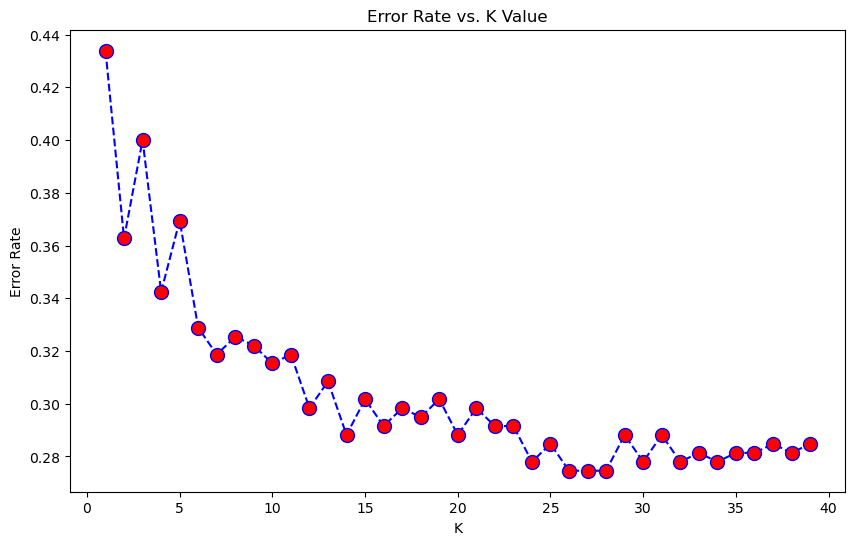

In [22]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

# therefore k=15 has the lowest error rate

In [23]:
# create classifier model
knn = KNeighborsClassifier(n_neighbors=26)

# Model training
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Now we compare y_pred with y_test to see how accurate our model was
accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       192
           1       0.71      0.36      0.48       103

    accuracy                           0.73       295
   macro avg       0.72      0.64      0.65       295
weighted avg       0.72      0.73      0.70       295

Training accuracy: 0.73
Testing accuracy: 0.73


## Logistic Regression

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
warnings.filterwarnings("ignore")

In [25]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming ICU_filtered is your DataFrame
# First, make sure the target variable is correctly interpreted as a categorical variable
#ICU_filtered['In.hospital_death'] = ICU_filtered['In.hospital_death'].astype('category')

# Create a pairplot with hue based on the 'In.hospital_death' variable
# Select relevant features; replace 'Feature1', 'Feature2', ... with actual feature names
#features = ICU_filtered.select_dtypes(include=[np.number]).columns.tolist()  # Get numerical columns

# Add the target variable to the list of features for the pairplot
#features.append('In.hospital_death')

# Plot pairplot
#sns.pairplot(ICU_filtered[features], hue='In.hospital_death', palette={0: 'red', 1: 'green'})
#plt.show()

### Use correlation coefficients method to choose features

In [26]:
# correlation analysis
correlation = ICU_filtered.corr()['In.hospital_death']
correlations = ICU_filtered.drop(['In.hospital_death'], axis=1).corrwith(ICU_filtered['In.hospital_death'])
selected_features = correlations.abs().sort_values(ascending=False).index
print(f"Selected features based on correlation: {selected_features.tolist()[:3]}")

Selected features based on correlation: ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']


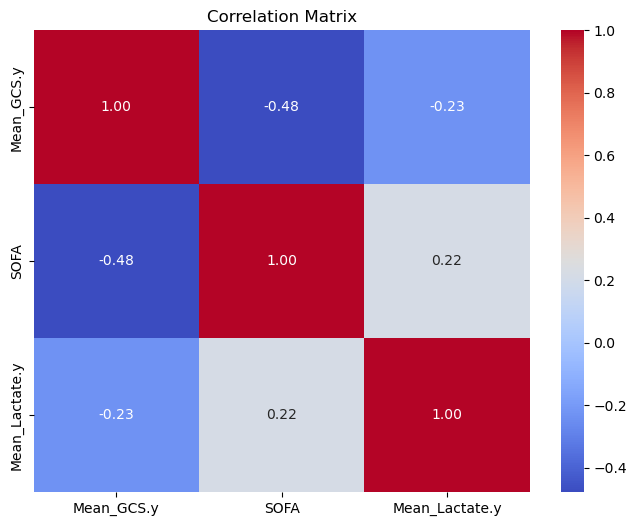

In [27]:
# Compute the correlation matrix (exclude the 'In hospital death' column)
corr_matrix = ICU_filtered.loc[:,['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
correlations = ICU_filtered.drop(['In.hospital_death'], axis=1).corrwith(ICU_filtered['In.hospital_death'])
absolute_correlations = correlations.abs().sort_values(ascending=False)

# Print correlations with feature names
for feature, value in absolute_correlations.items():
    print(f"{feature}: {value:.4f}")

Mean_GCS.y: 0.3861
SOFA: 0.2257
Mean_Lactate.y: 0.1776
SAPS.I: 0.1674
Mean_HCO3.y: 0.1605
Mean_Bilirubin.y: 0.1523
Mean_BUN.y: 0.1379
Mean_HR.y: 0.1357
ICUType2: 0.1316
Mean_WBC.y: 0.1304
Mean_Mg.y: 0.1254
Mean_Albumin.y: 0.1230
Mean_NIMAP.y: 0.1222
Mean_SysABP.y: 0.1083
Mean_AST.y: 0.1083
Mean_PaCO2.y: 0.1063
Mean_NISysABP.y: 0.1043
Mean_Glucose.y: 0.1015
Mean_ALT.y: 0.0939
Mean_Urine.y: 0.0882
ICUType4: 0.0878
Mean_ALP.y: 0.0711
Mean_Creatinine.y: 0.0628
Mean_Na.y: 0.0606
Mean_Platelets.y: 0.0583
Mean_MAP.y: 0.0578
Mean_NIDiasABP.y: 0.0552
Age: 0.0466
ICUType3: 0.0440
Mean_DiasABP.y: 0.0365
Mean_FiO2.y: 0.0304
Mean_SaO2.y: 0.0281
Mean_pH.y: 0.0267
Mean_PaO2.y: 0.0188
Mean_TroponinI.y: 0.0176
Mean_Weight.y: 0.0161
Mean_Cholesterol.y: 0.0110
Mean_Temp.y: 0.0089
Mean_RespRate.y: 0.0049
Mean_GCT.y: 0.0047
Mean_TroponinT.y: 0.0046
RecordID: 0.0030
Gender: 0.0027
Height: 0.0019
Mean_K.y: 0.0015
Mean_MechVent.y: nan


In [29]:
# Select the top 10 features
top_10_features = absolute_correlations.head(10)

# Create a DataFrame for tabulation
top_10_df = pd.DataFrame({
    'Feature': top_10_features.index,
    'Absolute Correlation': top_10_features.values
})

# Reset the index for neat display
top_10_df = top_10_df.reset_index(drop=True)

# Display the DataFrame
top_10_df

,Feature,Absolute Correlation
0,Mean_GCS.y,0.386052
1,SOFA,0.225708
2,Mean_Lactate.y,0.177576
3,SAPS.I,0.167370
4,Mean_HCO3.y,0.160508
5,Mean_Bilirubin.y,0.152299
6,Mean_BUN.y,0.137934
7,Mean_HR.y,0.135712
8,ICUType2,0.131581
9,Mean_WBC.y,0.130429


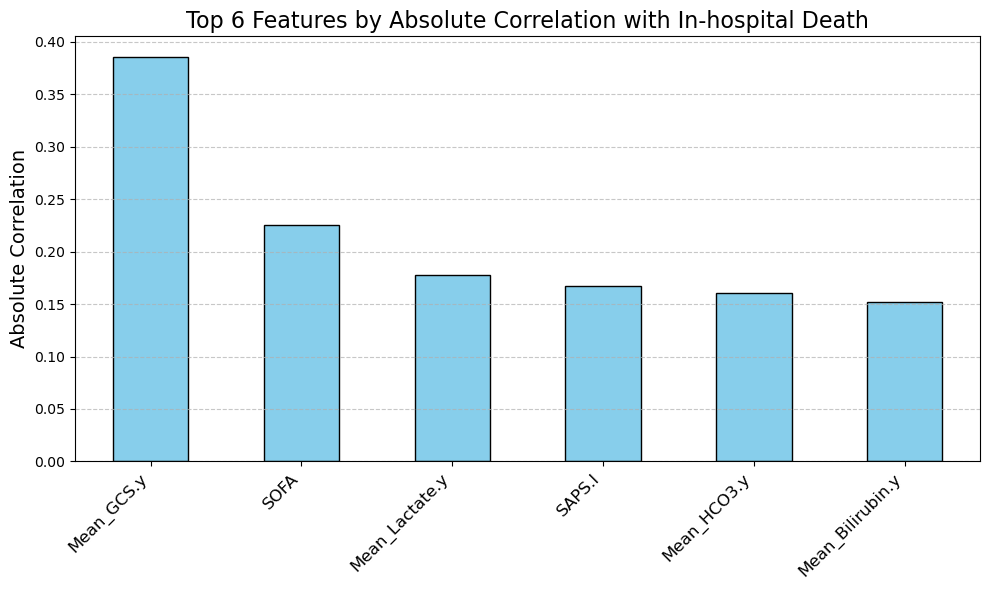

In [49]:
# Select the top 6 features
top_features = absolute_correlations.head(6)

# Create the bar plot
plt.figure(figsize=(10, 6))
top_features.plot.bar(color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 6 Features by Absolute Correlation with In-hospital Death', fontsize=16)
plt.ylabel('Absolute Correlation', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

selected features: ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']
Binary Classification Accuracy: 0.71
[[161  31]
 [ 54  49]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       192
           1       0.61      0.48      0.54       103

    accuracy                           0.71       295
   macro avg       0.68      0.66      0.66       295
weighted avg       0.70      0.71      0.70       295



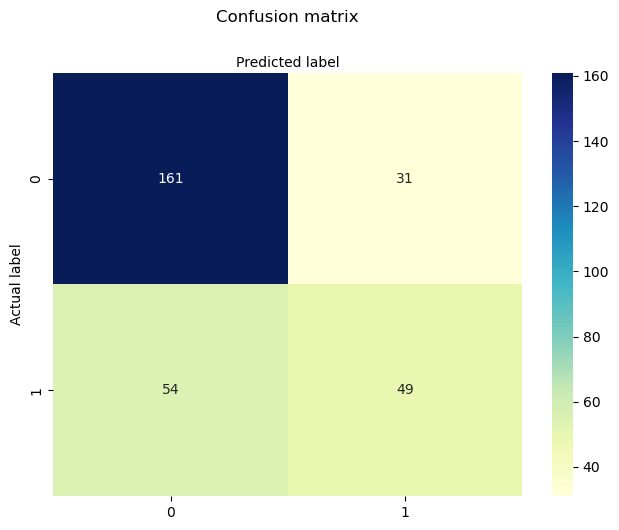

Training accuracy: 0.71
Testing accuracy: 0.71


In [50]:
# Separate features and target
X = ICU_filtered[selected_features[:3]]
print("selected features:",selected_features.to_list()[:3])
y = ICU_filtered['In.hospital_death']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
binary_model = LogisticRegression()
binary_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = binary_model.predict(X_test)
print(f"Binary Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_train_pred = binary_model.predict(X_train)
y_test_pred = binary_model.predict(X_test)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")


In [32]:
#Precision: Out of all the patients that the model predicted would die in hospital, only 64% actually did.
#Recall: Out of all the patients that actually did die in hospital, 
#        the model only predicted this outcome correctly for 49% of those patients.

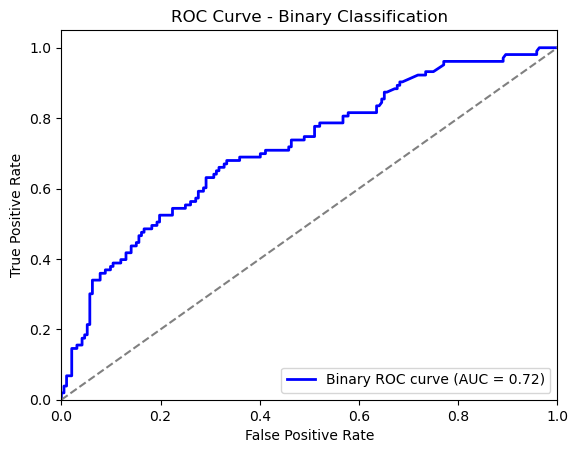

In [33]:
#Visualization
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Predict probabilities for the binary classifier
y_prob = binary_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for the binary classifier
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for binary classification
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.show()

### Using Recursive Feature Elimination (RFE) method to choose features

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

### 1. Using RFE select top 5 features

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

list = ICU_filtered.columns.to_list()

# Load the dataset
X = ICU_filtered.drop('In.hospital_death',axis=1) # features
y = ICU_filtered['In.hospital_death'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 5 features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i]:
        print('Column: %d, Selected %s, Rank: %.3f, Name: %s' % (i, rfe.support_[i], rfe.ranking_[i], list[i]))
        
# Train the model using the selected features on the training data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model on the test set
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with selected features: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

Column: 8, Selected True, Rank: 1.000, Name: Mean_GCS.y
Column: 10, Selected True, Rank: 1.000, Name: Mean_NIDiasABP.y
Column: 11, Selected True, Rank: 1.000, Name: Mean_NIMAP.y
Column: 12, Selected True, Rank: 1.000, Name: Mean_NISysABP.y
Column: 39, Selected True, Rank: 1.000, Name: Mean_Bilirubin.y
Test set accuracy with selected features: 0.7153
[[161  31]
 [ 53  50]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       192
           1       0.62      0.49      0.54       103

    accuracy                           0.72       295
   macro avg       0.68      0.66      0.67       295
weighted avg       0.71      0.72      0.71       295

Training accuracy: 0.72
Testing accuracy: 0.72


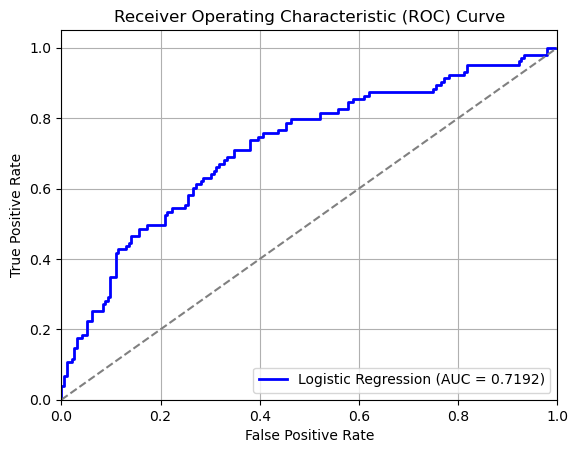

In [35]:
#Visualization
# Predict probabilities of the test data
y_pred_proba = model.predict_proba(X_test_rfe)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 2. Using RFE select top 4 features

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

list = ICU_filtered.columns.to_list()

# Load the dataset
X = ICU_filtered.drop('In.hospital_death',axis=1) # features
y = ICU_filtered['In.hospital_death'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 4 features
rfe = RFE(model, n_features_to_select=4)
rfe.fit(X_train, y_train)

# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i]:
        print('Column: %d, Selected %s, Rank: %.3f, Name: %s' % (i, rfe.support_[i], rfe.ranking_[i], list[i]))
        
# Train the model using the selected features on the training data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model on the test set
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with selected features: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

Column: 8, Selected True, Rank: 1.000, Name: Mean_GCS.y
Column: 10, Selected True, Rank: 1.000, Name: Mean_NIDiasABP.y
Column: 11, Selected True, Rank: 1.000, Name: Mean_NIMAP.y
Column: 12, Selected True, Rank: 1.000, Name: Mean_NISysABP.y
Test set accuracy with selected features: 0.7085
[[161  31]
 [ 55  48]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       192
           1       0.61      0.47      0.53       103

    accuracy                           0.71       295
   macro avg       0.68      0.65      0.66       295
weighted avg       0.70      0.71      0.70       295

Training accuracy: 0.71
Testing accuracy: 0.71


### 3. Using RFE select top 3 features

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

list = ICU_filtered.columns.to_list()

# Load the dataset
X = ICU_filtered.drop('In.hospital_death',axis=1) # features
y = ICU_filtered['In.hospital_death'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 3 features
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i]:
        print('Column: %d, Selected %s, Rank: %.3f, Name: %s' % (i, rfe.support_[i], rfe.ranking_[i], list[i]))
        
# Train the model using the selected features on the training data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model on the test set
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with selected features: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

Column: 8, Selected True, Rank: 1.000, Name: Mean_GCS.y
Column: 10, Selected True, Rank: 1.000, Name: Mean_NIDiasABP.y
Column: 11, Selected True, Rank: 1.000, Name: Mean_NIMAP.y
Test set accuracy with selected features: 0.7051
[[159  33]
 [ 54  49]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       192
           1       0.60      0.48      0.53       103

    accuracy                           0.71       295
   macro avg       0.67      0.65      0.66       295
weighted avg       0.69      0.71      0.70       295

Training accuracy: 0.70
Testing accuracy: 0.71


### 4. Using RFE select top 2 features

In [38]:
## from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

list = ICU_filtered.columns.to_list()

# Load the dataset
X = ICU_filtered.drop('In.hospital_death',axis=1) # features
y = ICU_filtered['In.hospital_death'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 2 features
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X_train, y_train)

# summarize all features
for i in range(X.shape[1]):
    if rfe.support_[i]:
        print('Column: %d, Selected %s, Rank: %.3f, Name: %s' % (i, rfe.support_[i], rfe.ranking_[i], list[i]))
        
# Train the model using the selected features on the training data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model on the test set
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with selected features: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

Column: 8, Selected True, Rank: 1.000, Name: Mean_GCS.y
Column: 11, Selected True, Rank: 1.000, Name: Mean_NIMAP.y
Test set accuracy with selected features: 0.6983
[[160  32]
 [ 57  46]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       192
           1       0.59      0.45      0.51       103

    accuracy                           0.70       295
   macro avg       0.66      0.64      0.65       295
weighted avg       0.69      0.70      0.69       295

Training accuracy: 0.70
Testing accuracy: 0.70


### In conclusion, select top 5 features give the best accuracy score, which is 0.7153

## Decision Forest Classification

In [39]:
# correlation analysis
correlation = ICU_filtered.corr()['In.hospital_death']
correlations = ICU_filtered.drop(['In.hospital_death'], axis=1).corrwith(ICU_filtered['In.hospital_death'])
selected_features = correlations.abs().sort_values(ascending=False).index
print(f"Selected features based on correlation: {selected_features.tolist()[:3]}")

Selected features based on correlation: ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']


Test set accuracy with selected features: 0.7017

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.80       192
           1       0.64      0.33      0.44       103

    accuracy                           0.70       295
   macro avg       0.68      0.62      0.62       295
weighted avg       0.69      0.70      0.67       295

Training accuracy: 0.72
Testing accuracy: 0.70


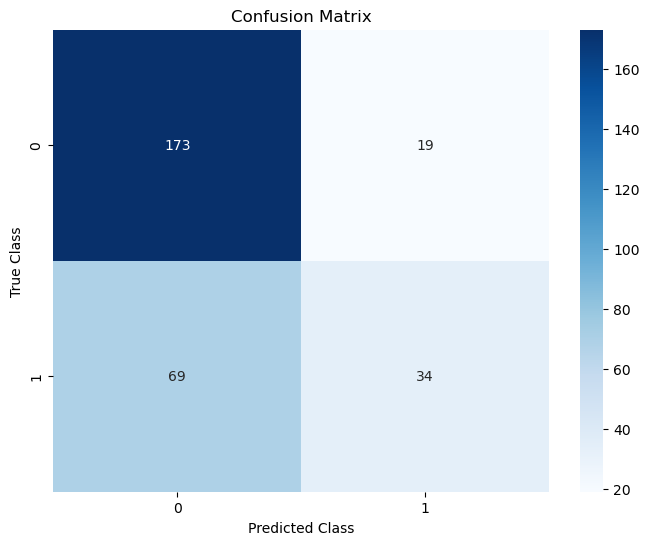

In [40]:
X = ICU_filtered[['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']]
y = ICU_filtered['In.hospital_death']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with selected features: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

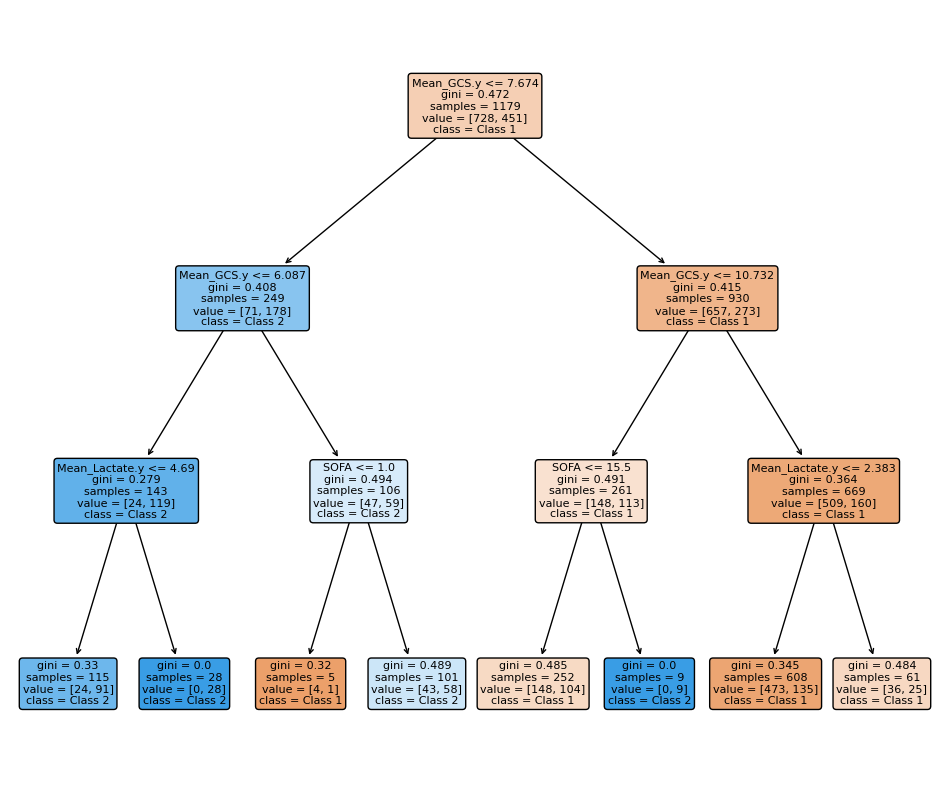

In [41]:
# plot the decision tree for the model df_dtc
plt.figure(figsize=(12,10))
plot_tree(classifier, 
         filled = True, # colour the nodes according to the classifaction
         rounded = True, # make the nodes have rounded corners
         class_names = ['Class 1', 'Class 2'], # use these names for targets
         feature_names = ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y'],  # use these names for features
         fontsize=8
         );

## Random Forest

Selected features based on correlation: ['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']
Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       192
           1       0.45      0.39      0.42       103

    accuracy                           0.62       295
   macro avg       0.58      0.57      0.57       295
weighted avg       0.61      0.62      0.62       295

Training accuracy: 0.96
Testing accuracy: 0.62


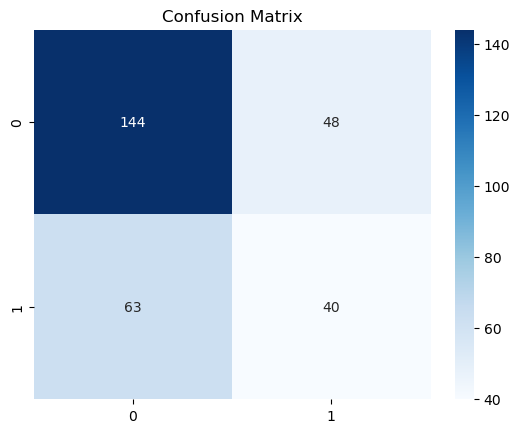

In [42]:
from sklearn.ensemble import RandomForestClassifier

# correlation analysis
correlation = ICU_filtered.corr()['In.hospital_death']
correlations = ICU_filtered.drop(['In.hospital_death'], axis=1).corrwith(ICU_filtered['In.hospital_death'])
selected_features = correlations.abs().sort_values(ascending=False).index
print(f"Selected features based on correlation: {selected_features.tolist()[:3]}")

X = ICU_filtered[['Mean_GCS.y', 'SOFA', 'Mean_Lactate.y']]
y = ICU_filtered['In.hospital_death']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print(f"Training accuracy: {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Testing accuracy: {accuracy_score(y_test,y_test_pred):.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()